In [66]:
# Class imbalance >> when one class has higher percentage 
# handle class imbalance problem
# upsampling
# downsampling
# SMOTE

In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # for reproducibility

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(class_0_ratio*no_samples)
no_class_1 = 100

In [68]:
class_0 = {"features_0": np.random.normal(0, 1, no_class_0),
           "features_1": np.random.normal(0, 1, no_class_0),
           "target": ([0] * no_class_0)}

In [69]:
class_0 = pd.DataFrame(class_0)
class_0

,features_0,features_1,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [70]:
class_1 = pd.DataFrame({"features_0": np.random.normal(0, 1, no_class_1),
           "features_1": np.random.normal(0, 1, no_class_1),
           "target": ([1] * no_class_1)})
class_1

,features_0,features_1,target
0,-1.307971,0.933630,1
1,1.472396,-1.763775,1
2,0.074876,-0.410217,1
3,-1.786935,-0.453667,1
4,0.165211,-0.589430,1
...,...,...,...
95,0.213026,0.188583,1
96,-0.804542,0.560918,1
97,-0.646582,-0.921659,1
98,1.138173,0.647375,1


In [71]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
len(df)

1000

In [72]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [73]:
# unsampleing 

df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [74]:
df_minority

,features_0,features_1,target
900,-1.307971,0.933630,1
901,1.472396,-1.763775,1
902,0.074876,-0.410217,1
903,-1.786935,-0.453667,1
904,0.165211,-0.589430,1
...,...,...,...
995,0.213026,0.188583,1
996,-0.804542,0.560918,1
997,-0.646582,-0.921659,1
998,1.138173,0.647375,1


In [75]:
from sklearn.utils import resample

In [76]:
df_minority_upsample = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1)

In [77]:
# df_minority_upsample.target.value_counts()

In [78]:
df_upsample = pd.concat([df_majority, df_minority_upsample]).reset_index(drop= True)

In [79]:
df_upsample.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [80]:
#downsampling

df_downsampling = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1)
df_downsampling

,features_0,features_1,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [81]:
df_majority_downsampling = pd.concat([df_minority, df_downsampling]).reset_index(drop=True)
df_majority_downsampling

,features_0,features_1,target
0,-1.307971,0.933630,1
1,1.472396,-1.763775,1
2,0.074876,-0.410217,1
3,-1.786935,-0.453667,1
4,0.165211,-0.589430,1
...,...,...,...
195,-1.579156,2.711950,0
196,-1.044589,0.522655,0
197,0.410266,0.683356,0
198,-1.114871,-0.800787,0


In [82]:
df_majority_downsampling[df_majority_downsampling.target==1]

,features_0,features_1,target
0,-1.307971,0.933630,1
1,1.472396,-1.763775,1
2,0.074876,-0.410217,1
3,-1.786935,-0.453667,1
4,0.165211,-0.589430,1
...,...,...,...
95,0.213026,0.188583,1
96,-0.804542,0.560918,1
97,-0.646582,-0.921659,1
98,1.138173,0.647375,1


In [83]:
df_majority_downsampling.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [84]:
# SMOTE >> Synthetic Minority Oeversampling Technique

In [85]:
from sklearn.datasets import make_classification

In [86]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, weights=[0.9], n_clusters_per_class=1, random_state=1)

In [87]:
len(X)

1000

In [88]:
len(y)

1000

In [89]:
df1 = pd.DataFrame(X, columns=['feature_0', 'feature_1']) 
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1).reset_index(drop=True)

In [90]:
final_df.isna().sum()

feature_0    0
feature_1    0
target       0
dtype: int64

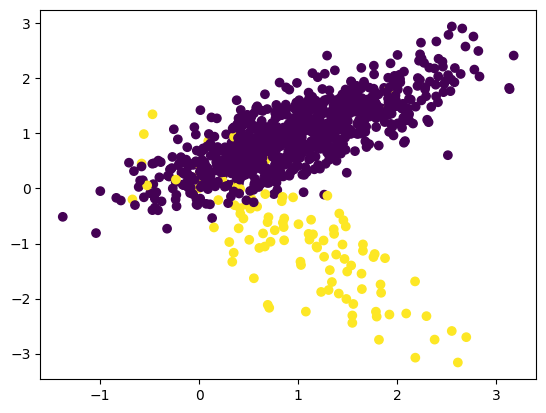

In [91]:
plt.scatter(final_df['feature_0'], final_df['feature_1'], c=final_df['target'])
plt.show()

In [92]:
#for import imblearn >>> pip install imblearn

In [93]:
pip install imblearn

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
oversample = SMOTE()

In [105]:
X, y = oversample.fit_resample(final_df[['feature_0', 'feature_1']], final_df['target'])
X

C:\Users\Anshil\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Anshil\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,feature_0,feature_1
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.994633,-2.209790
1784,1.387607,-0.763921
1785,1.796302,-2.361427
1786,0.317679,-1.024461


In [109]:
df_1 = pd.DataFrame(X, columns=['feature_0', 'feature_1']) 
df_2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df_1, df_2], axis=1).reset_index(drop=True)

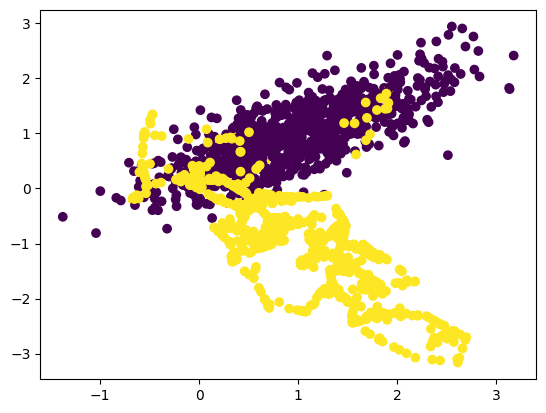

In [110]:
plt.scatter(oversample_df['feature_0'], oversample_df['feature_1'], c=oversample_df['target'])
plt.show()